In [1]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv('STEM_Salaries.csv')

In [4]:
df1 = df.copy()

# Data Description - Variables in the data and their data types

The dataset source is Kaggle - Data Science & STEM Salaries(https://www.kaggle.com/jackogozaly/data-science-and-stem-salaries), scraped off from https://www.levels.fyi/, which is a crowdsourcing platform, that has collected the “most accurate public data on salaries, benefits, leveling, and more”, as stated on their website.

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  float64
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40137 non-null  object 
 14  cityid                

The dataset has 62642 rows, each indicating an employee record. The dataset columns are about demographic, professional and other factors related to each employee. 
* Demographic factors are Education, Gender, Race and Location [city, state, country]
* Professional factors are Current Company, Job Title, Level, Years of Experience, Years at Company, Total Yearly Compensation, Base Salary, Bonus, and Stock Grant
* Other columns included Timestamp, rownumber, dmaid,tag (which we later dropped as was not necessary for analysis).

In [6]:
df1.describe(include='all')

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Race,Education
count,62642,62637,62523,62642,6.264200e+04,62642,62642.000000,62642.000000,61788,6.264200e+04,6.264200e+04,62642.000000,43102,40137,62642.000000,62640.000000,62642.000000,22427,30370
unique,62561,1631,2917,15,NaN,1050,NaN,NaN,3058,NaN,NaN,NaN,4,12841,NaN,NaN,NaN,5,5
top,10/25/2019 10:26:31,Amazon,L4,Software Engineer,NaN,"Seattle, WA",NaN,NaN,Full Stack,NaN,NaN,NaN,Male,Masters,NaN,NaN,NaN,Asian,Master's Degree
freq,3,8126,5014,41231,NaN,8701,NaN,NaN,11382,NaN,NaN,NaN,35702,3983,NaN,NaN,NaN,11772,15391
mean,NaN,NaN,NaN,NaN,2.163004e+05,NaN,7.204135,2.702093,NaN,1.366873e+05,5.148608e+04,19334.746588,NaN,NaN,9856.201989,616.097222,41694.723732,NaN,NaN
std,NaN,NaN,NaN,NaN,1.380337e+05,NaN,5.840375,3.263656,NaN,6.136928e+04,8.187457e+04,26781.292040,NaN,NaN,6679.104563,289.843390,24488.865879,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000e+04,NaN,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00,0.000000,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.350000e+05,NaN,3.000000,0.000000,NaN,1.080000e+05,0.000000e+00,1000.000000,NaN,NaN,7369.000000,506.000000,20069.250000,NaN,NaN
50%,NaN,NaN,NaN,NaN,1.880000e+05,NaN,6.000000,2.000000,NaN,1.400000e+05,2.500000e+04,14000.000000,NaN,NaN,7839.000000,807.000000,42019.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,2.640000e+05,NaN,10.000000,4.000000,NaN,1.700000e+05,6.500000e+04,26000.000000,NaN,NaN,11521.000000,807.000000,63021.750000,NaN,NaN


## Data Cleaning

We dropped the following columns because of the respective reasons:

* timestamp - This does not impact our analysis.
* tag - The values in tag are better categorized using the values in Title.
* dmaid - The values were not meaningful.
* rownumber - It's just an additional index for each row and is not required for the analysis.
* otherdetails - The values are redundant and reflected in other columns(such as title, race and education).

In [7]:
df1.drop(['dmaid','tag','timestamp','rowNumber','otherdetails'], axis=1,inplace=True)

In [8]:
df1.columns

Index(['company', 'level', 'title', 'totalyearlycompensation', 'location',
       'yearsofexperience', 'yearsatcompany', 'basesalary', 'stockgrantvalue',
       'bonus', 'gender', 'cityid', 'Race', 'Education'],
      dtype='object')

### Gender Column

In [9]:
df1.gender.unique()

array([nan, 'Male', 'Female', 'Other', 'Title: Senior Software Engineer'],
      dtype=object)

Replacing NaN entries and 'Title: Senior Software Engineer' with *Other*.

In [10]:
df1.gender.fillna('Other',inplace=True)

In [11]:
df1.gender.replace('Title: Senior Software Engineer','Other',inplace=True)

In [12]:
df1.gender.unique()

array(['Other', 'Male', 'Female'], dtype=object)

### Location Column

In [13]:
df1.location.unique()

array(['Redwood City, CA', 'San Francisco, CA', 'Seattle, WA', ...,
       'Pasir Ris, SG, Singapore', 'Richmond, VA, United States',
       'Hilbert, WI'], dtype=object)

Cleaning up location column and deleting data related to other countries, since our focus is on US.

In [14]:
#Step 1: Splitting location column to city, state and country
df1[['city','state','country','other']] = df1['location'].str.split(',',expand=True)

In [15]:
df1.country.unique()

array([None, ' United Kingdom', ' Ireland', ' India', ' Belarus',
       ' Canada', ' Russia', ' Netherlands', ' Switzerland', ' Singapore',
       ' Germany', ' Japan', ' Sweden', ' Australia', ' United States',
       ' Israel', ' Poland', ' China', ' Austria', ' Luxembourg',
       ' Czech Republic', ' France', ' Pakistan', ' New Zealand',
       ' Denmark', ' Hong Kong (SAR)', ' South Africa', ' Spain',
       ' United Arab Emirates', ' Hungary', ' Brazil', ' Bulgaria',
       ' Philippines', ' Indonesia', ' Puerto Rico', ' Taiwan',
       ' Romania', ' Mexico', ' Costa Rica', ' Marshall Islands',
       ' Vietnam', ' Panama', ' Argentina', ' Norway', ' Moldova',
       ' Estonia', ' Kenya', ' Turkey', ' Italy', ' Lithuania',
       ' Nigeria', ' Korea', ' Ukraine', ' Jordan', ' Thailand',
       ' Colombia', ' Serbia', ' Portugal', ' Guatemala', ' Yugoslavia',
       ' Uruguay', ' Slovakia', ' Bangladesh', ' Finland', ' Chile',
       ' Malaysia', ' Latvia', ' Saudi Arabia', ' Per

In [16]:
#Step 2: Since all countries other than United States were mentioned, filling NaN columns with 'United States'
df1.country.fillna("United States", inplace=True)

In [17]:
df1[['city','state','country','other']].head(10)

,city,state,country,other
0,Redwood City,CA,United States,None
1,San Francisco,CA,United States,None
2,Seattle,WA,United States,None
3,Sunnyvale,CA,United States,None
4,Mountain View,CA,United States,None
5,Seattle,WA,United States,None
6,Redmond,WA,United States,None
7,Seattle,WA,United States,None
8,Redmond,WA,United States,None
9,Seattle,WA,United States,None


In [18]:
df1.other.unique()

array([None, ' South'], dtype=object)

In [19]:
#Step 3: Dropping the 'other' column since it was specific to South Korea
df1.drop(['other'],axis=1,inplace=True)

In [20]:
df1.columns

Index(['company', 'level', 'title', 'totalyearlycompensation', 'location',
       'yearsofexperience', 'yearsatcompany', 'basesalary', 'stockgrantvalue',
       'bonus', 'gender', 'cityid', 'Race', 'Education', 'city', 'state',
       'country'],
      dtype='object')

In [21]:
#Step 4: Filtering out records only related to United States
df1.drop(df1[df1.country != 'United States'].index,inplace=True)

In [22]:
df1.country.unique()

array(['United States'], dtype=object)

#### Splitting US states into regions - East Coast, West Coast and Central

In [23]:
df1.state.unique()

array([' CA', ' WA', ' NY', ' MD', ' OR', ' DC', ' TX', ' MA', ' LA',
       ' PA', ' SC', ' VA', ' CO', ' NE', ' IN', ' WI', ' MN', ' IL',
       ' NJ', ' AZ', ' OH', ' NC', ' FL', ' GA', ' MO', ' RI', ' UT',
       ' MI', ' CT', ' NM', ' AR', ' VT', ' IA', ' KS', ' NH', ' ID',
       ' TN', ' DE', ' AL', ' NV', ' KY', ' Israel', ' WV', ' OK', ' MS',
       ' ME', ' MT', ' ND', ' HI', ' WY'], dtype=object)

In [24]:
#Step 5: Deleting the empty space before all the state names.
df1[['spachar','state']] = df1['state'].str.split(' ',expand=True)

In [25]:
df1.state.unique()

array(['CA', 'WA', 'NY', 'MD', 'OR', 'DC', 'TX', 'MA', 'LA', 'PA', 'SC',
       'VA', 'CO', 'NE', 'IN', 'WI', 'MN', 'IL', 'NJ', 'AZ', 'OH', 'NC',
       'FL', 'GA', 'MO', 'RI', 'UT', 'MI', 'CT', 'NM', 'AR', 'VT', 'IA',
       'KS', 'NH', 'ID', 'TN', 'DE', 'AL', 'NV', 'KY', 'Israel', 'WV',
       'OK', 'MS', 'ME', 'MT', 'ND', 'HI', 'WY'], dtype=object)

In [26]:
#Step 6: Deleting the anomaly record of Israel.
df1.drop(df1[df1.state == 'Israel'].index,inplace=True)

In [27]:
df1.state.unique()
df1.state.nunique()

array(['CA', 'WA', 'NY', 'MD', 'OR', 'DC', 'TX', 'MA', 'LA', 'PA', 'SC',
       'VA', 'CO', 'NE', 'IN', 'WI', 'MN', 'IL', 'NJ', 'AZ', 'OH', 'NC',
       'FL', 'GA', 'MO', 'RI', 'UT', 'MI', 'CT', 'NM', 'AR', 'VT', 'IA',
       'KS', 'NH', 'ID', 'TN', 'DE', 'AL', 'NV', 'KY', 'WV', 'OK', 'MS',
       'ME', 'MT', 'ND', 'HI', 'WY'], dtype=object)

49

We have data from 49 US states.

In [28]:
df1.spachar.unique()

array([''], dtype=object)

In [29]:
#Dropping spachar column
df1.drop(['spachar'],axis=1,inplace=True)

In [30]:
#Step 7: Creating list of east and west regions
east = ['CT','DE','FL','GA','IN','KY','ME','MD','MA','MI','NH','NJ',\
        'NY','NC','OH','PA','RI','SC','TN','VT','VA','WV']
west = ['AK','CA','OR','WA','ID','NV']

In [31]:
#Step 8: Creating an empty column named region to denote which region the state is located in
df1['region'] = None

In [32]:
def regions(name):
    if name in east:
        return 'East'
    elif name in west:
        return 'West'
    else:
        return 'Central'

In [33]:
df1['region'] = df1['state'].apply(regions)

In [34]:
df1.region.unique()

array(['West', 'East', 'Central'], dtype=object)

In [35]:
df1[df1.region=='East'].head()

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,cityid,Race,Education,city,state,country,region
29,Google,T6,Software Engineer,440000,"New York, NY",14.0,12.0,0.0,0.0,0.0,Other,10182,NaN,NaN,New York,NY,United States,East
45,Oath,IC2,Software Engineer,88000,"Baltimore, MD",5.0,1.0,0.0,0.0,0.0,Other,8909,NaN,NaN,Baltimore,MD,United States,East
117,Google,T2,Software Engineer,110000,"New York, NY",0.0,0.0,95000.0,0.0,5000.0,Other,10182,NaN,NaN,New York,NY,United States,East
134,Amazon,L4,Software Engineer,170000,"New York, NY",0.0,0.0,125000.0,5000.0,39000.0,Other,10182,NaN,NaN,New York,NY,United States,East
139,Google,T7,Software Engineer,1120000,"New York, NY",10.0,7.0,252000.0,790000.0,78000.0,Other,10182,NaN,NaN,New York,NY,United States,East


In [36]:
df1[df1.region=='West'].head()

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,cityid,Race,Education,city,state,country,region
0,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,107000.0,20000.0,10000.0,Other,7392,NaN,NaN,Redwood City,CA,United States,West
1,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,0.0,0.0,0.0,Other,7419,NaN,NaN,San Francisco,CA,United States,West
2,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,155000.0,0.0,0.0,Other,11527,NaN,NaN,Seattle,WA,United States,West
3,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,157000.0,180000.0,35000.0,Other,7472,NaN,NaN,Sunnyvale,CA,United States,West
4,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,0.0,0.0,0.0,Other,7322,NaN,NaN,Mountain View,CA,United States,West


In [37]:
df1[df1.region=='Central'].head()

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,cityid,Race,Education,city,state,country,region
146,Oracle,IC3,Product Manager,150000,"Washington, DC",3.0,3.0,107000.0,33000.0,10000.0,Other,40303,NaN,NaN,Washington,DC,United States,Central
178,IBM,7,Software Engineer,84000,"Austin, TX",3.0,3.0,80000.0,100.0,4000.0,Other,10965,NaN,NaN,Austin,TX,United States,Central
244,GE Digital,Staff,Software Engineer,124000,"New Orleans, LA",12.0,2.0,114000.0,0.0,10000.0,Other,8774,NaN,NaN,New Orleans,LA,United States,Central
354,Microsoft,65,Product Manager,293000,"Boulder, CO",16.0,5.0,183000.0,60000.0,50000.0,Male,7534,NaN,NaN,Boulder,CO,United States,Central
398,Mutual of Omaha,"Mid-grade (of Jr, Mid, Sr)",Software Engineer,105000,"Omaha, NE",2.0,2.0,93000.0,0.0,12000.0,Male,1265,NaN,NaN,Omaha,NE,United States,Central


In [38]:
len(df1)

52838

After filtering out data for only US records, we have 52838 records left for analysis.

### Work Experience Column

Creating categories for Years of Experience(WorkEx) and Years at Company(WorkEx_Company)

In [39]:
#If years of experience is lesser than years at company, we are replacing it with years at company
df1['yearsofexperience'] = np.where(df1['yearsofexperience'] < df1['yearsatcompany'], \
                                   df1['yearsatcompany'], df1['yearsofexperience'])

In [40]:
df1['WorkEx'] = pd.cut(df1['yearsofexperience'],bins=[0, 1, 6, 11, 16, 21, 31, 41,100]\
                       ,right=False,labels=['0','1-5','6-10', '11-15','16-20','21-30','31-40','>40'])

In [41]:
df1['WorkEx_Company'] = pd.cut(df1['yearsatcompany'],bins=[0, 1, 6, 11, 16, 21, 31, 41,100],\
                               right=False,labels=['0','1-5','6-10', '11-15','16-20','21-30','31-40','>40'])

In [42]:
df1.groupby('WorkEx')[['WorkEx']].count()

,WorkEx
WorkEx,
0,3955
1-5,21946
6-10,14714
11-15,7277
16-20,3623
21-30,1229
31-40,88
>40,6


In [43]:
df1.groupby('WorkEx_Company')[['WorkEx_Company']].count()

,WorkEx_Company
WorkEx_Company,
0,13841
1-5,31788
6-10,5405
11-15,1281
16-20,401
21-30,115
31-40,6
>40,1


### Salary Data - TotalYearlyCompensation , Basesalary , Bonus, Stockgrantvalue

In [44]:
#Replacing the null values with the average Salary
df1.basesalary.replace(0,df1.basesalary.mean(),inplace=True)

In [45]:
df1.rename(columns={'totalyearlycompensation' : 'salary', 'basesalary':'base',\
                    'stockgrantvalue':'stock' }, inplace=True)

In [46]:
df1.columns

Index(['company', 'level', 'title', 'salary', 'location', 'yearsofexperience',
       'yearsatcompany', 'base', 'stock', 'bonus', 'gender', 'cityid', 'Race',
       'Education', 'city', 'state', 'country', 'region', 'WorkEx',
       'WorkEx_Company'],
      dtype='object')

### Level Column

In [47]:
df1.level.value_counts().head(25)

L4                          4216
L5                          4058
L3                          2779
L6                          2453
Senior Software Engineer    1284
L2                           959
Senior                       881
L7                           787
ICT4                         697
E5                           659
63                           650
L1                           645
Software Engineer            642
62                           632
61                           612
ICT3                         586
IC4                          582
E4                           561
IC3                          546
64                           541
60                           525
59                           494
SDE II                       471
Associate                    439
IC5                          439
Name: level, dtype: int64

In [48]:
df1.level.nunique()

2492

There is too much variation in the levels mentioned and there is usually no golden standard across companies on levels of employees. We will use the years of experience and salary as a proxy for the level instead.

In [49]:
df1.drop('level',axis=1,inplace=True)

In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52838 entries, 0 to 62641
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   company            52835 non-null  object  
 1   title              52838 non-null  object  
 2   salary             52838 non-null  int64   
 3   location           52838 non-null  object  
 4   yearsofexperience  52838 non-null  float64 
 5   yearsatcompany     52838 non-null  float64 
 6   base               52838 non-null  float64 
 7   stock              52838 non-null  float64 
 8   bonus              52838 non-null  float64 
 9   gender             52838 non-null  object  
 10  cityid             52838 non-null  int64   
 11  Race               17593 non-null  object  
 12  Education          24422 non-null  object  
 13  city               52838 non-null  object  
 14  state              52838 non-null  object  
 15  country            52838 non-null  object  
 16  regi

## Data Analysis

<div class="alert alert-block alert-success">Clustering (Machine Learning) - To find interesting patterns in the STEM career</div>

#### Data Preparation for Clustering

In [51]:
df_clu = df1.copy()

Converting demographic columns from catagorical to numerical ones

In [52]:
#Step 1: dummy variables
df_clu = pd.get_dummies(df_clu,columns=['region'])
df_clu = pd.get_dummies(df_clu,columns=['gender'])
df_clu = pd.get_dummies(df_clu,columns=['Education'])
df_clu = pd.get_dummies(df_clu,columns=['Race'])

In [53]:
df_clu.columns

Index(['company', 'title', 'salary', 'location', 'yearsofexperience',
       'yearsatcompany', 'base', 'stock', 'bonus', 'cityid', 'city', 'state',
       'country', 'WorkEx', 'WorkEx_Company', 'region_Central', 'region_East',
       'region_West', 'gender_Female', 'gender_Male', 'gender_Other',
       'Education_Bachelor's Degree', 'Education_Highschool',
       'Education_Master's Degree', 'Education_PhD', 'Education_Some College',
       'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_Two Or More',
       'Race_White'],
      dtype='object')

In [54]:
df_clu.rename(columns={"Education_Master's Degree":"Masters_Degree",\
                       "Education_Bachelor's Degree":"Bachelors_Degree",\
                       "Education_PhD":"Doctorate_Degree",\
                       "Education_Some College":"Some_College",\
                       "Education_Highschool":"Highschool"},inplace=True)

In [55]:
#Step 2: Dropping categorical columns for running algorithm
df_clu.drop(['company','title','location','WorkEx','WorkEx_Company',\
             'city','state','country'], axis=1,inplace=True)

In [56]:
#Step 3: Final columns used for clustering
df_clu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52838 entries, 0 to 62641
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   salary             52838 non-null  int64  
 1   yearsofexperience  52838 non-null  float64
 2   yearsatcompany     52838 non-null  float64
 3   base               52838 non-null  float64
 4   stock              52838 non-null  float64
 5   bonus              52838 non-null  float64
 6   cityid             52838 non-null  int64  
 7   region_Central     52838 non-null  uint8  
 8   region_East        52838 non-null  uint8  
 9   region_West        52838 non-null  uint8  
 10  gender_Female      52838 non-null  uint8  
 11  gender_Male        52838 non-null  uint8  
 12  gender_Other       52838 non-null  uint8  
 13  Bachelors_Degree   52838 non-null  uint8  
 14  Highschool         52838 non-null  uint8  
 15  Masters_Degree     52838 non-null  uint8  
 16  Doctorate_Degree   528

In [57]:
from sklearn.cluster import KMeans
clu = KMeans(n_clusters=4, random_state=0)

In [58]:
clu.fit(df_clu)

KMeans(n_clusters=4, random_state=0)

In [59]:
clu.labels_

array([0, 0, 3, ..., 3, 3, 0], dtype=int32)

In [60]:
df_plot=df_clu.copy()

In [61]:
df_plot['cluster']=clu.labels_

In [62]:
df_clusters = df_plot.groupby('cluster').mean()
df_clusters

,salary,yearsofexperience,yearsatcompany,base,stock,bonus,cityid,region_Central,region_East,region_West,...,Bachelors_Degree,Highschool,Masters_Degree,Doctorate_Degree,Some_College,Race_Asian,Race_Black,Race_Hispanic,Race_Two Or More,Race_White
cluster,,,,,,,,,,,,,,,,,,,,,
0,152791.535230,5.015282,2.297167,125911.083742,14188.124284,12241.639137,10254.373130,0.176884,0.260066,0.563050,...,0.214770,0.003775,0.231267,0.015867,0.005872,0.176220,0.015553,0.021599,0.014085,0.130365
1,447412.241379,11.765345,3.513086,216553.867114,183504.844828,39405.995690,8805.731207,0.028448,0.103793,0.867759,...,0.126552,0.004138,0.247931,0.058448,0.005690,0.144828,0.005690,0.013448,0.012759,0.117069
2,823811.085973,15.132353,4.460860,254411.757403,448113.789593,66608.561086,8774.888009,0.016968,0.076923,0.906109,...,0.109729,0.001131,0.221719,0.070136,0.006787,0.116516,0.003394,0.004525,0.010181,0.128959
3,270385.531866,9.021580,3.162604,172097.533018,65315.793082,26834.210566,9245.723863,0.059229,0.146163,0.794607,...,0.142344,0.004218,0.265078,0.039391,0.005017,0.169194,0.007924,0.014651,0.010660,0.106430


<AxesSubplot:xlabel='cluster', ylabel='count'>

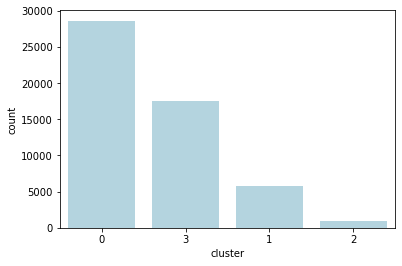

In [63]:
sns.countplot(x='cluster',data=df_plot,color='lightblue',order = df_plot['cluster'].value_counts().index)

<div class="alert alert-block alert-danger">
Observation: We noticed that the key differentiator among the 4 clusters is salary and years of experience. And, as expected in a pyramid structure, higher salary brackets have lower number of employees.
</div>

### Finding 1: Is a Masters or PhD worth it? 

Summary: Since Education is expensive, we want to analyse if higher education is worth the time, effort and money spent.

In [64]:
len(df1)

52838

In [65]:
df1.Education.count()

24422

Only half of the records have education mentioned. But 24422 records is still a good subset for our analysis.

<AxesSubplot:ylabel='Education'>

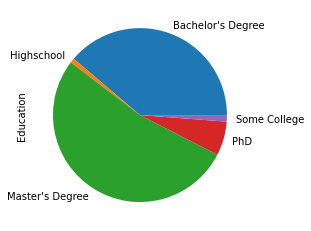

In [66]:
df1.groupby('Education')['Education'].count().plot(kind='pie')

In [67]:
#"High School" and "Some College" are only 200+ records each. 
#Hence, removing "Highschool" and "Some College" and focussing on Bachelors, Masters and PhD.
df_edu = df1[(df1.Education!="Highschool") & (df1.Education!="Some College")].copy()

In [68]:
len(df_edu[df_edu.Education.isna()==False])

23920

<AxesSubplot:ylabel='Education'>

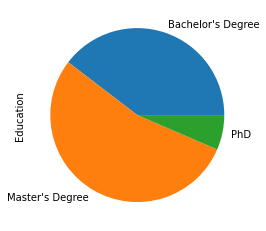

In [69]:
df_edu.groupby('Education')['Education'].count().plot(kind='pie')

<div class="alert alert-block alert-danger">
Observation: More than 50% of the Employees in the data have Masters Degree.
</div>

<AxesSubplot:xlabel='WorkEx', ylabel='count'>

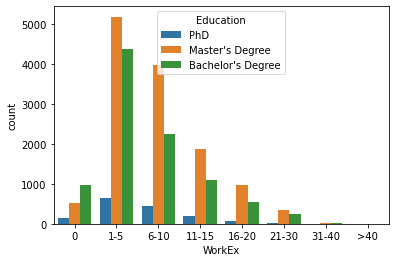

In [70]:
sns.countplot(x='WorkEx',data=df_edu,hue='Education')

The data gets lesser as Work Experience increases, so we will omit 30+ years with less than 100 records in our analysis. 

<AxesSubplot:xlabel='count', ylabel='title'>

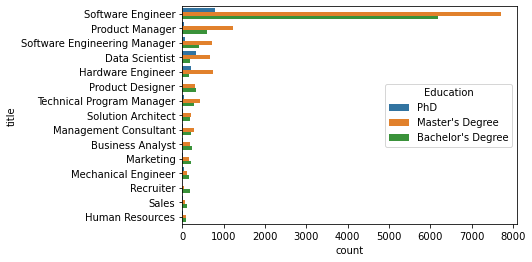

In [71]:
sns.countplot(y="title",data=df_edu,hue='Education',\
              order = df_edu['title'].value_counts().index)

<AxesSubplot:xlabel='count', ylabel='title'>

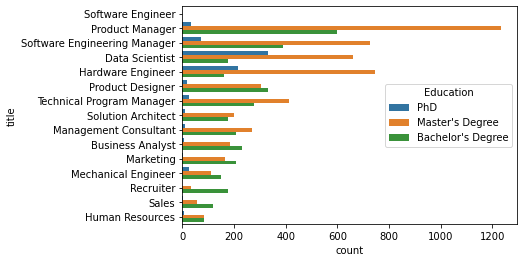

In [72]:
#Removing 'Software Engineer' title to adjust the scale since it increase the scale by 4 times
sns.countplot(y="title",data=df_edu[(df_edu.title == "Software Engineer")==False],hue='Education',\
              order = df_edu['title'].value_counts().index)

<div class="alert alert-block alert-danger">
Observations: 
<ul>
<li>As level of Education increases, people get into specialised technical fields.</li>
<li>Majority employees with PhD are in Software, Hardware & Data Scientist roles.</li>
<li>For Master's degree, along with specialised roles, we see people in managerial roles as well.</li>
<li>With Bachelor's degree, there is higher variation as employees are spread out from HR to Core Engineering roles.</li>
</ul></div>

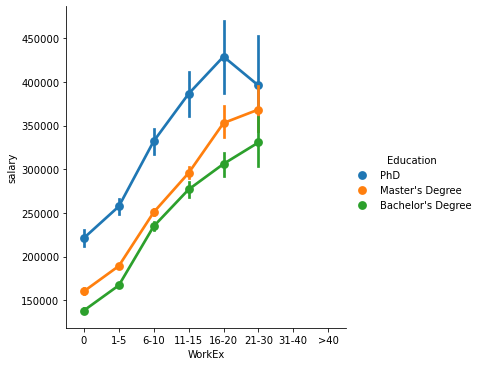

In [73]:
sns.catplot(x='WorkEx',y='salary',data=df_edu[(df_edu.yearsofexperience<30) & \
                                           (df_edu.WorkEx.str.contains("40")==False)],hue='Education',kind='point')

In [108]:
df_edu2 = df_edu.pivot_table(index='WorkEx',columns='Education',values='salary')
df_edu2['MastersBachelors_diff']=(df_edu2["Master's Degree"]-df_edu2["Bachelor's Degree"])/df_edu2["Bachelor's Degree"]
df_edu2['PhDMasters_diff']=(df_edu2["PhD"]-df_edu2["Master's Degree"])/df_edu2["Master's Degree"]
df_edu2.style.background_gradient(cmap='Blues')

Education,Bachelor's Degree,Master's Degree,PhD,MastersBachelors_diff,PhDMasters_diff
WorkEx,,,,,
0,138252.307692,160246.653920,221300.000000,0.159088,0.380996
1-5,167069.453964,189224.971009,257476.635514,0.132613,0.360691
6-10,234730.648770,250788.442211,332187.500000,0.068409,0.324573
11-15,276884.403670,295755.200000,386475.490196,0.068154,0.306741
16-20,306160.220994,352991.836735,429090.909091,0.152964,0.215583
21-30,330238.297872,371119.883041,402045.454545,0.123794,0.083330
31-40,266777.777778,284653.846154,570333.333333,0.067007,1.003603
>40,nan,155000.000000,nan,nan,nan


<div class="alert alert-block alert-danger">
Observations:
<ul>
<li>For Master’s, the salary is 10% higher than Bachelor’s on average, but there’s a 15% jump after 15 years of Work Experience. This might be because Employers tend to promote Master's holders over Bachelor's holders for higher positions.</li>
<li>For PhD, the salary is 30% higher than Masters. Difference is not just in the beginning years, but even with higher experience.</li>
</ul></div>

In [109]:
df_clusters[['salary','yearsofexperience','Bachelors_Degree','Masters_Degree','Doctorate_Degree']]\
            .sort_values('salary', ascending=False).style.background_gradient(cmap='Reds')

,salary,yearsofexperience,Bachelors_Degree,Masters_Degree,Doctorate_Degree
cluster,,,,,
2,823811.085973,15.132353,0.109729,0.221719,0.070136
1,447412.241379,11.765345,0.126552,0.247931,0.058448
3,270385.531866,9.021580,0.142344,0.265078,0.039391
0,152791.535230,5.015282,0.214770,0.231267,0.015867


<div class="alert alert-block alert-danger">
Observations:
<ul>
<li>The clustering data also shows a similar trend, where we see people with higher degree are in the higher salary cluster.</li>
<li>The number of PhDs have an increasing trend in the higher salary bracket.</li>
<li>The number of Master's degree holders are spread across but more higly concentrated in the mid range salary clusters.</li>
<li>The number of Bachelor's degree holders are in the lowest range salary cluster.</li>
</ul></div>

<div class="alert alert-block alert-success">Managerial Insight 1: Yes, higher education is worth it! For Masters, differentiation is more so in the long run. But, a PhD could catalyse the career throughout. </div>

### Finding 2: Is loyalty a reward or penalty?

Summary: There are 2 catagories of employees, where few stick to the same company for 10+ years but there is another set of employees who love to switch companies frequently. So, we wanted to explore which is better and if  there is an ideal time to spend in a company.

<AxesSubplot:xlabel='yearsatcompany', ylabel='salary'>

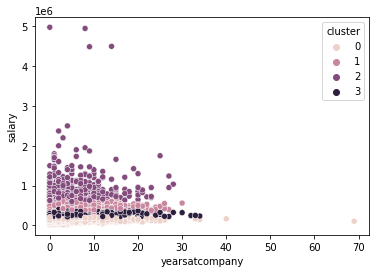

In [75]:
sns.scatterplot(y='salary',x='yearsatcompany',hue='cluster', data=df_plot)

<AxesSubplot:xlabel='yearsatcompany', ylabel='salary'>

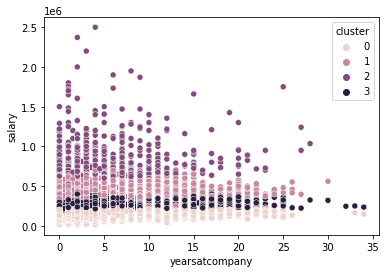

In [76]:
#Removing the outliers for the plot
sns.scatterplot(y='salary',x='yearsatcompany',hue='cluster',\
                data=df_plot[(df_plot.yearsatcompany<40) & (df_plot.salary<4000000)])

In [111]:
#Mean values in the clusters
df_clusters[['salary','yearsofexperience','yearsatcompany']].sort_values\
('salary', ascending=False).style.background_gradient(cmap='Reds')

,salary,yearsofexperience,yearsatcompany
cluster,,,
2,823811.085973,15.132353,4.460860
1,447412.241379,11.765345,3.513086
3,270385.531866,9.021580,3.162604
0,152791.535230,5.015282,2.297167


In [95]:
#Correlation between the columns in the initial dataset
df_clu[['salary','yearsofexperience','yearsatcompany']].corr()

,salary,yearsofexperience,yearsatcompany
salary,1.000000,0.443969,0.160350
yearsofexperience,0.443969,1.000000,0.532381
yearsatcompany,0.160350,0.532381,1.000000


<div class="alert alert-block alert-danger">
Observations:
<ul>
<li>The average years at company is 3-5 years for the people in the higher salary clusters(> $400,000).</li>
<li>While overall Work Experience is highly correlated with salary (44%), there is only a 16% correlation between Years at a company and Salary</li>
</ul></div>

<div class="alert alert-block alert-success">
Managerial Insight 2: No, it is not so rewarding to spend 10+ years in the same company. To earn more than $400,000, move on to the next challenge after 3-5 years.
</div>

### Finding 3: Is there really a gender pay gap in STEM?

Summary: This is to validate the over-hyped notion about female employees getting paid lesser than males with same education and work experience.

<AxesSubplot:ylabel='gender'>

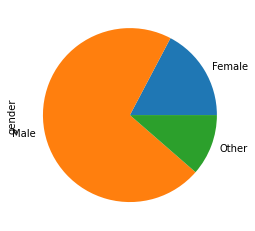

In [79]:
#To normalise education background of employees, filtering out the employees with Master's degree
df_edu[(df_edu.Education=="Master's Degree")].groupby(['gender'])['gender'].count().plot(kind='pie')

<AxesSubplot:xlabel='WorkEx', ylabel='count'>

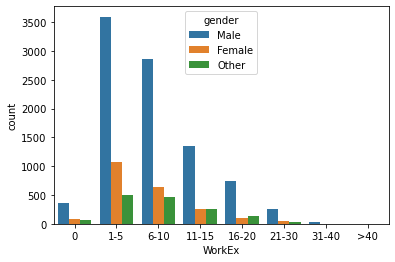

In [80]:
sns.countplot(x='WorkEx',data=df_edu[(df_edu.Education=="Master's Degree")],hue='gender')

<div class="alert alert-block alert-danger">
Observations:
<ul>
<li>Nearly 70% of Master's degree holders is Male</li>
<li>The number of Female employees with > 20 years of work experience is very low, probably because very few women would have opted for higher education in STEM 20 years ago.</li>
</ul></div>

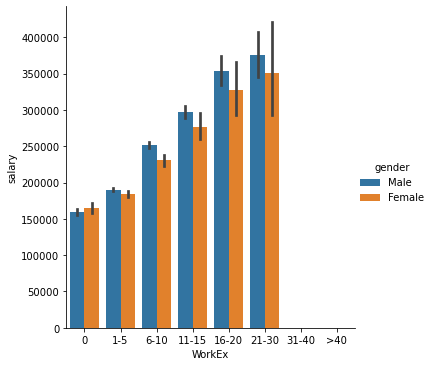

In [81]:
sns.catplot(x='WorkEx',y='salary',data=df_edu[(df_edu.Education=="Master's Degree")\
                                           &(df_edu.WorkEx.str.contains("40")==False)&\
                                              (df_edu.gender!='Other')],hue='gender',kind='bar')

<div class="alert alert-block alert-danger">
Observation: In the first 5 years of work experience, men and women start with equal pay. But gradually after 5 years, men seem to earn higher than women. But, is that the full story?
</div>

We wanted to dig deeper about where this difference is coming from, despite normalising the education and work experience. Hence, we explored the salary components (base salary and stock grant value) that could have created the gap.

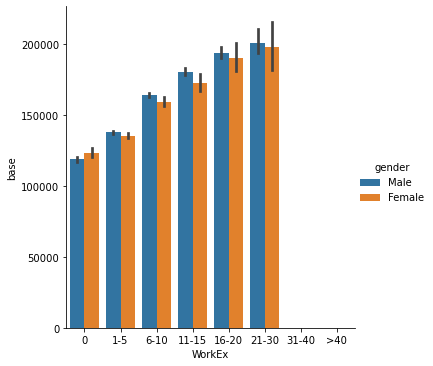

In [82]:
sns.catplot(x='WorkEx',y='base',data=df_edu[(df_edu.Education=="Master's Degree")\
                                            &(df_edu.WorkEx.str.contains("40")==False)&\
                                            (df_edu.gender!='Other')],hue='gender',kind='bar')

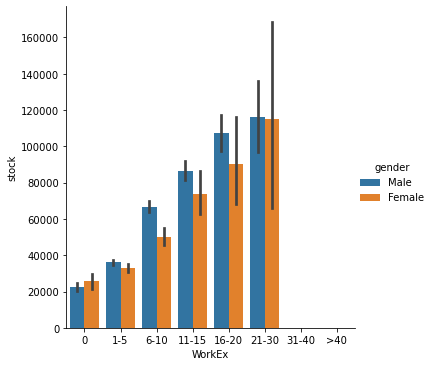

In [83]:
sns.catplot(x='WorkEx',y='stock',data=df_edu[(df_edu.Education=="Master's Degree")\
                                           &(df_edu.WorkEx.str.contains("40")==False)&(df_edu.gender!='Other')],\
                                            hue='gender',kind='bar')

In [112]:
#To find actual percent difference between Male and Female employees
gender1 = df_edu[(df_edu.Education=="Master's Degree")].groupby(['WorkEx','gender'])[['stock','base']].mean()
gender_salary = gender1.pivot_table(index='WorkEx',columns='gender')
gender_salary['base_pct_diff'] = 100*(gender_salary[('base',   'Male')]-\
                                      gender_salary[('base', 'Female')])/gender_salary[('base',   'Male')]
gender_salary['stock_pct_diff'] = 100*(gender_salary[('stock',   'Male')]-\
                                      gender_salary[('stock', 'Female')])/gender_salary[('stock',   'Male')]
gender_salary.style.background_gradient(cmap='Greens')

In [92]:
#Calculating the mean base and stock difference between men and women for 6-20 years of Work Ex
print ("Base Salary for men is",str(round(gender_salary.iloc[2:5].\
                                                     base_pct_diff.mean(), 2)),"% higher than women")
print ("Stock Grant Value for men is",str(round(gender_salary.iloc[2:5].\
                                                     stock_pct_diff.mean(), 2)),"% higher than women")

Base Salary for men is 3.15 % higher than women
Stock Grant Value for men is 18.5 % higher than women


<div class="alert alert-block alert-danger">
Observation: Just comparing for Master’s degree, while difference in base salary is less than 5% throughout, men get 20% more stock on average after 5+ years of Work Experience levels.
</ul></div>

<div class="alert alert-block alert-success">
Managerial Insight 3: Stock component of salary causes the main bias. Women should start negotiating better on stocks.
</div>

### Finding 4: How does a career in Data Science look like?

Summary: To understand the Data Science career persepective better.

<AxesSubplot:xlabel='region'>

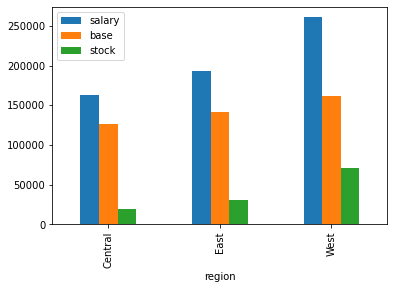

In [86]:
df_edu.groupby('region')[['salary','base','stock']].mean().plot(kind='bar')

In [87]:
#To analyse big tech, creating a new col GAFAM which denotes Google, Amazon, Facebook, Apple and Microsoft
df_edu['gafam'] = df_edu['company'].apply(lambda x: 1 if x in \
                                          ['Google', 'Amazon','Facebook', 'Apple', 'Microsoft'] else 0)

In [88]:
df_gafam = df_edu[df_edu.gafam == 1]

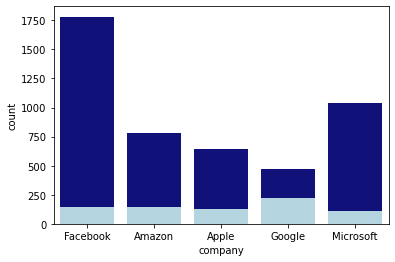

In [89]:
s1 = sns.countplot(x='company',data=df_gafam[df_gafam.Education=="Master's Degree"],color='darkblue')
s2 = sns.countplot(x='company',data=df_gafam[df_gafam.Education=="PhD"],color='lightblue')

<AxesSubplot:xlabel='company'>

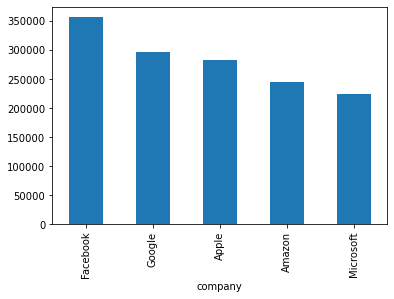

In [90]:
df_gafam.groupby('company')['salary'].mean().sort_values(ascending=False).plot(kind='bar')

<div class="alert alert-block alert-success">
More Insights: 
<ul>
<li>Good News: We are in the right place to earn. Salaries in the West Coast are much higher than East Coast. Again, the difference comes from stocks</li>
<li>While Google recruits more PhDs holders, all other major companies recruit more Master's holders.</li>
<li>Decreasing order of Average Pay in big-tech: Facebook > Google > Apple > Amazon > MS</li>
</ul>
</div>